In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
churn_df = pd.read_csv('data/churn.csv')

display(churn_df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
- CustomerId — идентификатор клиента
- Surname — фамилия клиента
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
- Geography — страна клиента (банк международный)
- Gender — пол клиента
- Age — возраст клиента
- Tenure — сколько лет клиент пользуется услугами банка
- Balance — баланс на счетах клиента в банке
- NumOfProducts — количество услуг банка, которые приобрёл клиент
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
- IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
- EstimatedSalary — предполагаемая заработная плата клиента
- Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

### нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

In [3]:
# delete 'RowNumber' column

churn_df.drop(columns='RowNumber', inplace=True)
churn_df['Exited'] = churn_df['Exited'].astype('category')

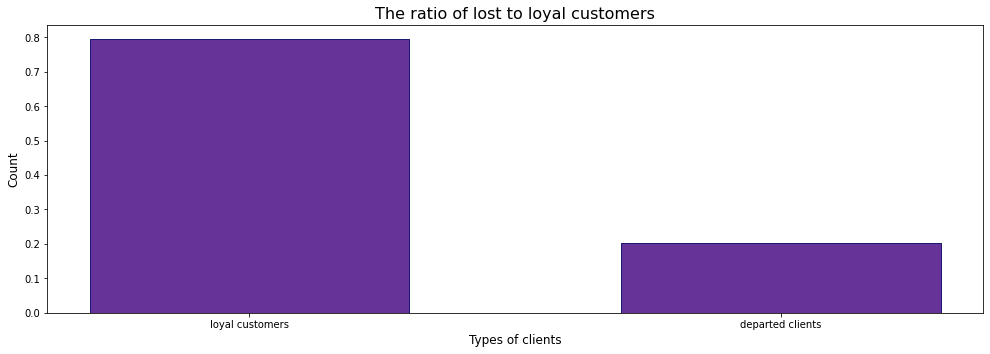

In [4]:
# Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

customer_ratio_series_procent = churn_df.value_counts('Exited', normalize=True)
customer_ratio_series_procent.set_axis(['loyal customers', 'departed clients'], inplace=True)

fig = plt.figure(figsize=(13,4))
main_exes = fig.add_axes([0, 0, 1, 1])
main_exes.bar(x=customer_ratio_series_procent.index, 
              height=customer_ratio_series_procent,
              width=0.6,
              color='rebeccapurple',
              edgecolor='midnightblue')
main_exes.set_ylabel('Count', fontsize=12)
main_exes.set_xlabel('Types of clients',fontsize=12)
main_exes.set_title('The ratio of lost to loyal customers', fontsize=16)

plt.show()

На графике видно, что большая часть клиентов продолжает пользоваться услугами банка. Количество лояльных клиентов больше  чем ушедших более чем в три раза. Тем не менее количество покинувших банк клиентов составляет значительные 20%.

Text(0.5, 1.0, 'User balance distribution')

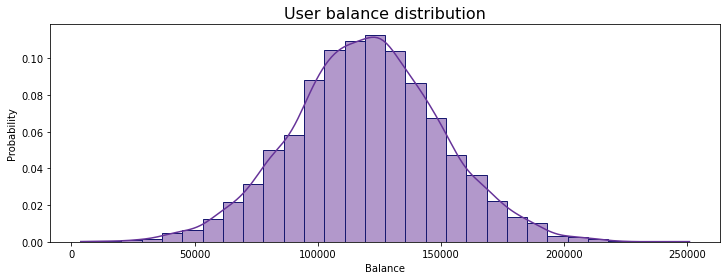

In [5]:
# Постройте график, показывающий распределение баланса пользователей, 
# у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

high_balance_users = churn_df[churn_df['Balance'] > 2500]

fig = plt.figure(figsize=(12,4))
balance_hist = sns.histplot(
    data=high_balance_users,
    x='Balance',
    bins=30,
    kde=True,
    stat='probability',
    color='rebeccapurple',
    edgecolor='midnightblue'
)

balance_hist.set_title('User balance distribution', fontsize=16)



Распределение данной величины является нормальным со средним равным 119827 и стандартным отклонением равным 30095. На графике видно, что баланс пользоватлей не привышает 250000, а наиболее часто встречающиеся значения располагаются в диапазоне [90000, 150000].

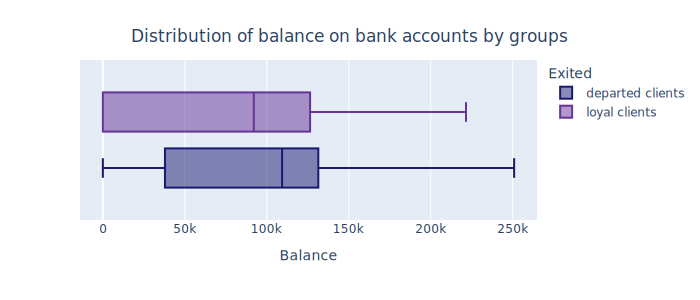

In [6]:
# Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

churn_df_copy1 = churn_df.copy()
churn_df_copy1['Exited'].replace([0, 1], ['loyal clients', 'departed clients'], inplace=True)

fig = px.box(
    data_frame=churn_df_copy1,
    x='Balance',
    color='Exited',
    height=300,
    width=700,
    color_discrete_map={
                'loyal clients': "rebeccapurple",
                'departed clients': "midnightblue"
                }
)

fig.update_layout(
    title={
        'text':'Distribution of balance on bank accounts by groups',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show('svg')

1) Максимальный пользовательский балан в 250 тысяч у клиентов, покинувших банк.
2) Наиболее широкий диапазон баланса на счетах у клиентов, покинувших банк.
3) Медианное значение баланса у клиентов, покинувших банк, выше.
4) Наименьший вклад у ушедших клиенто выше, чем у лояльных.

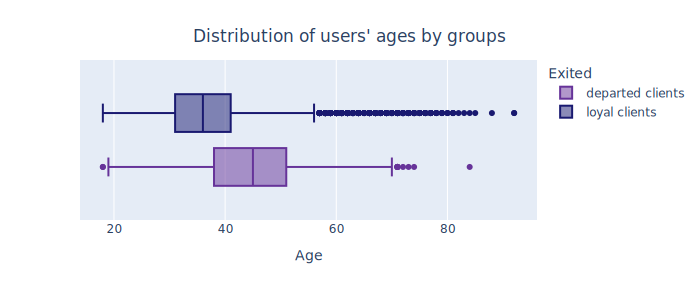

In [7]:
# Посмотрите на распределение возраста в разрезе признака оттока.
# В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

fig = px.box(
    data_frame=churn_df_copy1,
    x='Age',
    color='Exited',
    height=300,
    width=700,
    color_discrete_map={
                'departed clients': "rebeccapurple",
                'loyal clients': "midnightblue"
                }
)

fig.update_layout(
    title={
        'text':"Distribution of users' ages by groups",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show('svg')

1) Средний возраст людей, покинувших банк выше и составляет 45 лет.
2) Возрастной диапазон людей, покинувших банк, шире: [18, 71].
3) Люди, которые продолжают пользоваться банком - моложе, максимальный возраст лояльного пользователя - 57 лет.
4) Потенциальных выбросов в группе лояльных клиентов в разы больше: более 15 пользователей старше 60 лет.
5) Один из клиентов, покинувших банк, в возрасте 84 лет. Данное наблюдение можно считать выбросом.
6) Банку стоит обратить внимание на пользователей старше 38 лет.

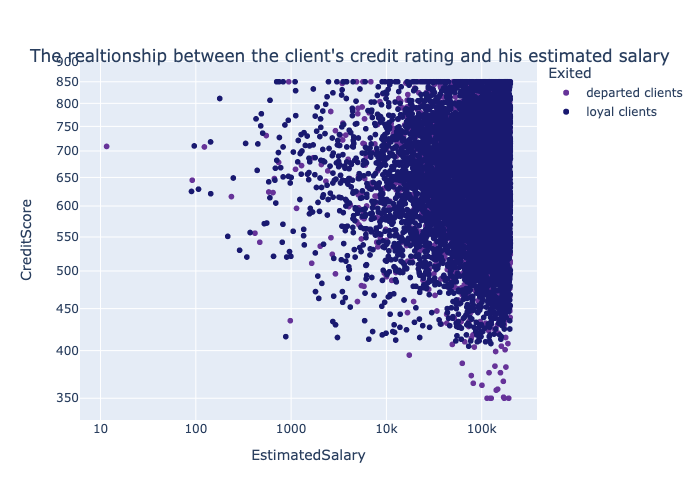

In [8]:
# Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? 
# Если не видите явной взаимосвязи, укажите это.

fig = px.scatter(
    data_frame=churn_df_copy1,
    x='EstimatedSalary',
    y='CreditScore',
    color='Exited',
    log_x=True,
    log_y=True,
    color_discrete_map={
                'departed clients': "rebeccapurple",
                'loyal clients': "midnightblue"
                }
)

fig.update_layout(
    title={
        'text':"The realtionship between the client's credit rating and his estimated salary",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show('png')

1) Четкой взаимосвязи даже после лагорифмирования переменных не наблюдается.
2) Обнаружена группа клиентов с высокой зарплатой и очень низким кредитным рейтингом, эти же люди покинули банк.
3) Чем выше зарплата, тем сильнее разброс в кредитном рейтинге.

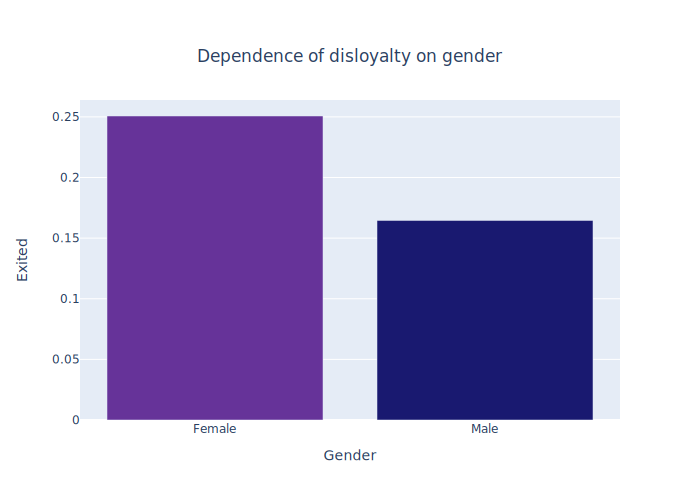

In [32]:
# Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

gender_left_df = churn_df.copy()
gender_left_df['Exited'] = gender_left_df['Exited'].astype(np.int8)
gender_left_df = gender_left_df.groupby('Gender', as_index=False).Exited.mean()

gender_left_bar = px.bar(
   data_frame=gender_left_df,
   x='Gender',
   y='Exited',
   title='Gender of departed customers',
   color=["rebeccapurple", "midnightblue"],
   color_discrete_map="identity"
)

gender_left_bar.update_layout(
    title={
        'text':"Dependence of disloyalty on gender",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)


gender_left_bar.show('svg')


Чаще всего уходят женщины. Ушедших женщин больше на 0.50% чем мужчин,

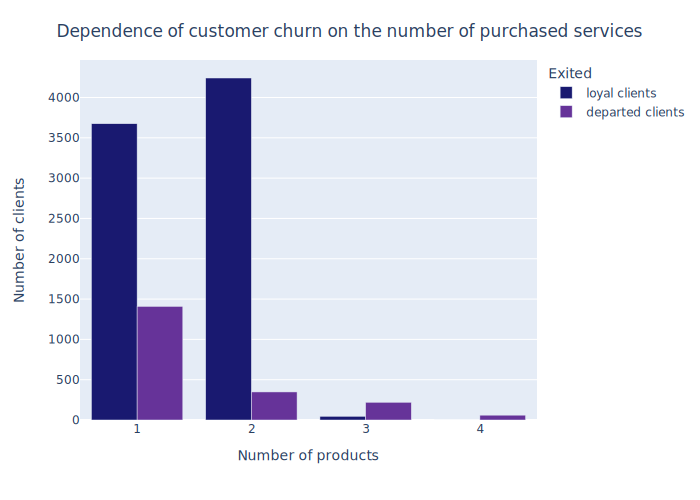

In [33]:
#  Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

num_of_products_df = churn_df_copy1.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()

boxplot = px.bar(
    data_frame=num_of_products_df,
    x='NumOfProducts',
    y='CustomerId',
    color='Exited',
    barmode='group',
    labels={
        'CustomerId':'Number of clients',
        'NumOfProducts':'Number of products'
    },
    color_discrete_map={
                'departed clients': "rebeccapurple",
                'loyal clients': "midnightblue"
                }
)

boxplot.update_layout(
    title={
        'text':"Dependence of customer churn on the number of purchased services",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

boxplot.show('svg')

1) Практически все лояльные клиенты используют одну-две услуги.
3) Больше 50% ушедших клиентов использовали только одну услугу.
3) Практически одинаковый процент, около 20%, ушедших пользователей использовлаи две-три услуги.
4) Среди лояльных клиентов подключение двух услуг наиболее популярная опция.

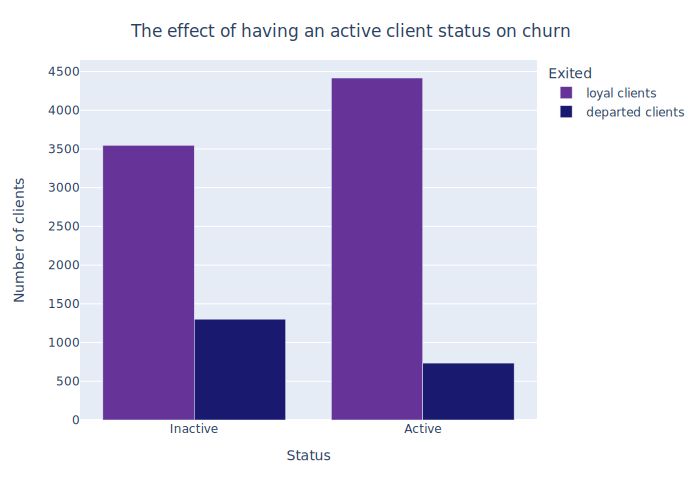

In [34]:
# Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, 
# чтобы уменьшить отток клиентов среди неактивных?

active_client_status = churn_df.groupby(['IsActiveMember', 'Exited'], as_index=False)['CustomerId'].count()
active_client_status['Exited'].replace([0, 1], ['loyal clients', 'departed clients'], inplace=True)
active_client_status['IsActiveMember'].replace([0, 1], ['Inactive', 'Active'], inplace=True)

active_client_status_bar = px.bar(
    data_frame=active_client_status,
    x='IsActiveMember',
    y='CustomerId',
    color='Exited',
    barmode='group',
    labels={
        'IsActiveMember':'Status',
        'CustomerId':'Number of clients'
    },
    color_discrete_map={
                'loyal clients': "rebeccapurple",
                'departed clients': "midnightblue"
                },
)

active_client_status_bar.update_layout(
    title={
        'text':"The effect of having an active client status on churn",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

active_client_status_bar.show('svg')

1) Среди лояльных клиентов чуть больше 50% являются активными и чуть меньше 50% - не являются активными пользователями.
2) Наиболее значительная разница видна между нелояльными клиентами, где около 65% не были активными пользователями, около 35% были активными пользователями.
3) Необходимо определить какими услугами пользуются лояльные неактивные клиенты, изучить возможные услуги в других учереждениях для внедрения и привлечения внимания.

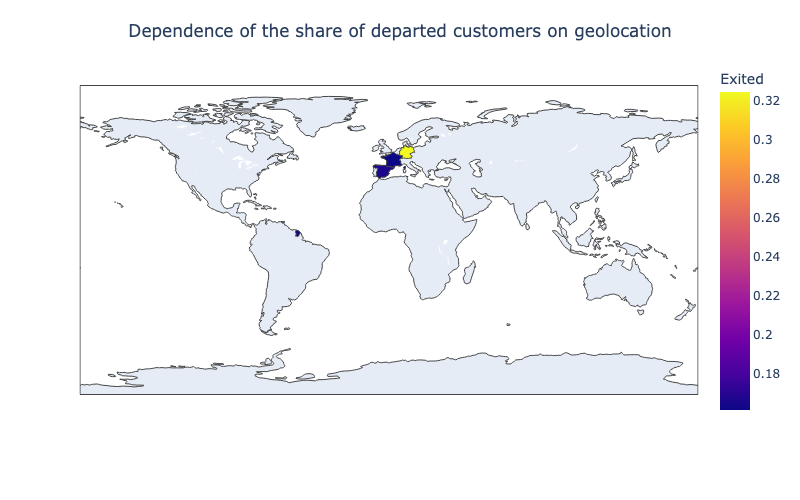

In [35]:
# В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, 
# которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.
new_churn_df = churn_df.copy()
new_churn_df['Exited'] = new_churn_df['Exited'].astype(np.int8)
new_churn_df = new_churn_df.groupby('Geography', as_index=False).Exited.mean()

fig = px.choropleth(
    data_frame=new_churn_df,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    width=800,
    height=500
)

fig.update_layout(
    title={
        'text':"Dependence of the share of departed customers on geolocation",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show('png')

На картограмме видно, что отток клиентов в Германии практически в два раза больше чем во Франции и Испании. Возможно это связано с тем, что в Германии очень сильная банковская система в связи с чем, открываются новые частные прогрессивные банки с более выгодными предложениями и улучшеными технологическими внедрениями.

In [36]:
# Переведите числовой признак CreditScore в категориальный. 

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [37]:
churn_df['CreditScore'] = churn_df['CreditScore'].apply(lambda x: get_credit_score_cat(x))

In [38]:
churn_df_copy2 = churn_df.copy()
churn_df_copy2['Exited'] = churn_df_copy2['Exited'].astype(np.int8)

pivot_table2 = churn_df_copy2.pivot_table(
    values='Exited',
    index='CreditScore',
    columns='Tenure',
    aggfunc='mean',
    
)

display(pivot_table2)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScore,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


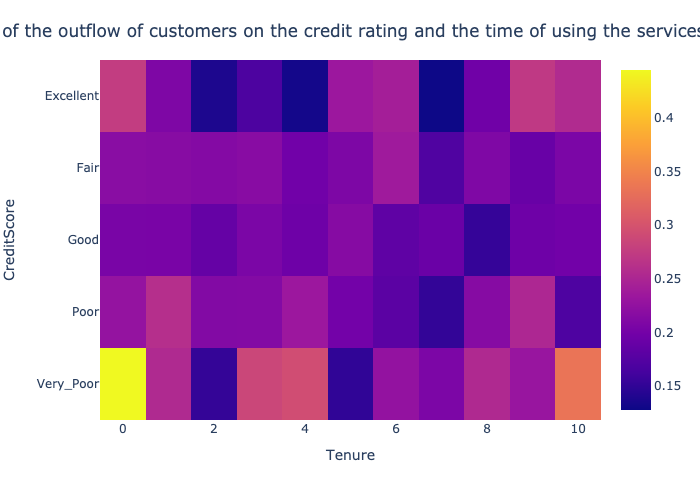

In [39]:
fig = px.imshow(pivot_table2)

fig.update_layout(
    title={
        'text':"Dependence of the outflow of customers on the credit rating and the time of using the services of the bank",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show('png')

1) На теплововй карте видно, что больше всего уходят те, у кого самый низкий кредитный рейтинг, более того эти клиенты даже год не пользовались услугами банка. 
2) На втором месте те, кто пользовался услугами банка 10 лет, но крединтный рейтинг тоже очень низкий.
3) Большая часть лояльных клиентов, как и следовало ожидать, с высоким кредитным рэйтингом и пользовались улугами банка хотя бы год.